# shAI Training 2023 | Level 1


## Task#10 (MNIST Project)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


## Get tha dataset

In [3]:
from sklearn.datasets import fetch_openml


In [4]:
# CODE HERE 
# IF you got stuck use GOOGLE
mnist = fetch_openml('mnist_784', as_frame=False)


### exploring and preparing the dataset

#### print your dataset to get insight

In [5]:
# CODE HERE
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Split you data into data and labels (target)

In [6]:
# CODE HERE
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

#### find the data shape using .shape function

In [7]:
print("X shape: ",X.shape)
print("y shape: ",y.shape)

X shape:  (70000, 784)
y shape:  (70000,)


In [ ]:
# CODE HERE


(70000, 784)

### Peek at one digit from the dataset

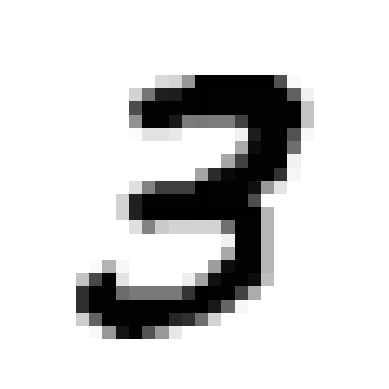

In [64]:
import matplotlib.pyplot as plt

some_digit = X[7]

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
plot_digit(some_digit)
plt.show()

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

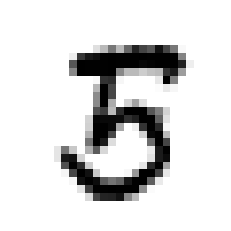

In [ ]:
# CODE HERE 


#### Split the data into train and test set

In [ ]:
import numpy as np 

In [15]:
# CODE HERE 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


### Shuffling the training set

In [ ]:
#hint shuffle-vs-permutation-numpy
# CODE HERE

# The MNIST dataset returned by
# fetch_openml() is actually already split into a training set (the first
# 60,000 images) and a test set (the last 10,000 images). The training set is already shuffled for us

#### access the label of the above digit image 

In [61]:
y[7]

'3'

In [ ]:
# CODE HERE


'5'

### Training a <font color= red>Binary</font> classifier 


#### Create the target vectors for this classification task
***NOTE : you can try different number.***

In [17]:
# CODE HERE
# If you got stuck use GOOGLE
y_train_3 = (y_train == '3')
y_test_3 =  (y_test == '3')

### SGD classifier

#### Create a SGD classifier 

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(random_state=42)

In [ ]:
# CODE HERE


SGDClassifier(random_state=42)

#### use SGD classifier  to detect images of the number 5 

In [65]:
# CODE HERE
sgd_clf.predict([some_digit])

array([False])

## Performance measure 

####  Measuring Accuracy Using <font color= blue>Cross-validation</font>

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")


array([0.9496 , 0.9624 , 0.96275])

In [ ]:
# CODE HERE


array([0.9663, 0.9452, 0.9532])

#### Try a dumb classifier

In [69]:
# CODE HERE
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_3)
print(any(dummy_clf.predict(X_train)))

False


#### find cross_val_score for the dumb classifier

In [70]:
cross_val_score(dummy_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.89785, 0.8978 , 0.8978 ])

In [ ]:
#CODE HERE



array([0.9112 , 0.9098 , 0.90795])

## Confusion matrix

In [72]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#### try to find confusion matrix 

In [73]:
y_train_pred = cross_val_predict(sgd_clf,X_train, y_train_3, cv=3)

In [74]:
cm = confusion_matrix(y_train_3, y_train_pred)
cm

array([[53477,   392],
       [ 2113,  4018]])

In [ ]:
# CODE HERE


array([[52786,  1793],
       [  913,  4508]], dtype=int64)

####  try perfect classifier which will have only true positives and true negative


In [75]:
cm = confusion_matrix(y_train_3, y_train_3)
cm

array([[53869,     0],
       [    0,  6131]])

In [ ]:
# CODE HERE


array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall

In [77]:
from sklearn.metrics import precision_score, recall_score,f1_score

***Note that precision and recall score might be different from one to anothor***

#### find precision score

In [78]:
precision_score(y_train_3, y_train_pred)

0.9111111111111111

In [ ]:
# CODE HERE


0.7154419933343914

#### find recall score

In [79]:
recall_score(y_train_3, y_train_pred)


0.655358016636764

In [ ]:
# CODE HERE


0.831580889134846

#### find f1 score 
***Notice that f1 score is harmonic mean between recall and precision***

In [80]:
f1_score(y_train_3, y_train_pred)

0.7623565126648325

In [ ]:
# CODE HERE


0.7691520218392766

# Precision/Recall Tradeof

#### try to use decision_function() and make prediction

In [82]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-501.39324785])

In [ ]:
# CODE HERE


array([4914.69426452])

#### Set the threshold to zero

In [84]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
# CODE HERE


array([ True])

#### Set the threshold to 200000

In [85]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
# CODE HERE


array([False])

#### To decide which threshold you want to use find decision scores for all instances

In [86]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3,
                             method="decision_function")

In [87]:
y_scores

array([ -8938.67345168, -17073.83659907,  -2250.42625883, ...,
       -15330.33317379, -25099.35767753, -36457.78038114])

In [ ]:
# CODE HERE


array([-12194.76411527, -22007.4062434 ,  -6016.53379274, ...,
       -21527.81640879, -11638.19845222,  -3883.00357483])

#### computing precision and recall for all possible thresholds using the precision_recall_curve() 

In [88]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

#### plot precision and recall as functions of the threshold value using Matplotlib

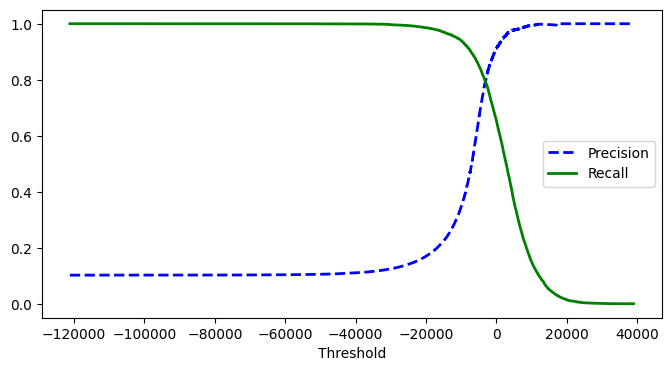

In [91]:
# CODE HERE
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()


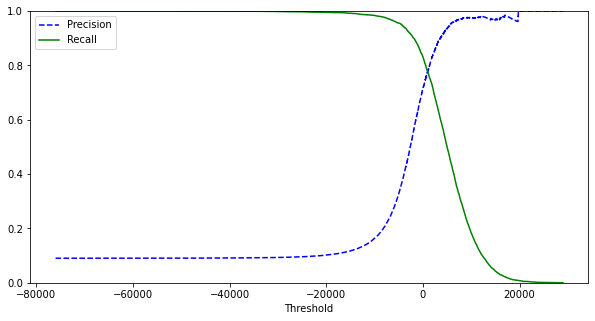

#### lets aim for 90%recall 
#### try different threshold and see what will happen

In [97]:
idx_for_90_recall = (recalls <= 0.90).argmax()

#### precision score

In [98]:
threshold_for_90_recall = thresholds[idx_for_90_recall]
threshold_for_90_recall

-7208.850286745553

In [99]:
y_train_pred_90 = (y_scores >= threshold_for_90_recall)

In [100]:
precision_score(y_train_3, y_train_pred_90)


0.48509628066473226

In [ ]:
# CODE HERE


0.32735085945399395

#### recall score

In [101]:
recall_score(y_train_3, y_train_pred_90)


0.8998532050236503

In [ ]:
#CODE HERE


0.955543257701531

# The ROC Curve

In [102]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

#### plot the FPR against the TPR using Matplotlib

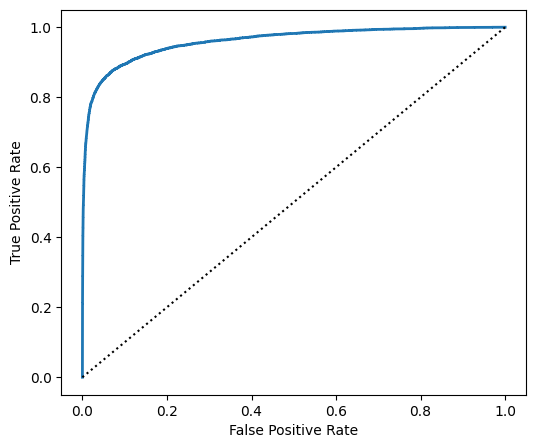

In [105]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()

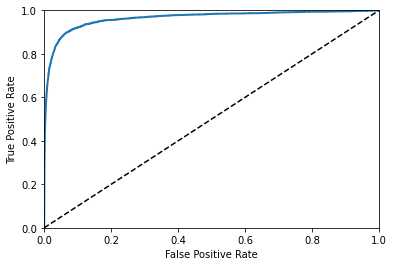

In [ ]:
# CODE HERE


#### computing the ROC AUC score

In [106]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_3, y_scores)

0.9599243001892759

# RandomForest Classifier
#### train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
# CODE HERE
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_3, cv=3, method="predict_proba")

#### try to plot ROC 
***Notice that you will need scores not probabilities***

In [111]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest_roc = roc_curve(y_train_3, y_scores_forest)

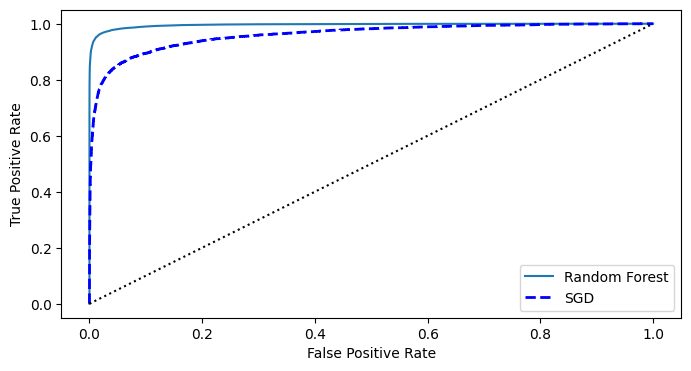

In [116]:
plt.figure(figsize=(8, 4))
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.plot(fpr, tpr, '--b', linewidth=2,  label="SGD")
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

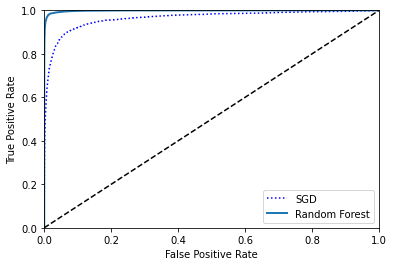

In [ ]:
# CODE HERE
# if you got suck use GOOGLE


#### find ROC AUC score for randomforestclassifier

In [117]:
roc_auc_score(y_train_3, y_scores_forest)

0.995864544068936

In [ ]:
# CODE HERE 


0.9984712735923079


# Congrats you did it 🥳 !
# #shAI_Club